In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
nba = pd.read_excel('advanced.xlsx', sheet_name = 'Sheet3')

In [62]:
nba.head(5)

,year,per,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,1984-85,12.075439,0.507904,0.034588,0.348383,6.736842,12.628655,9.684211,13.329825,1.609942,...,16.847076,18.920468,1.399415,1.375439,2.771930,0.059906,-1.778655,-0.220760,-1.999708,0.672515
1,1985-86,12.207627,0.508359,0.039661,0.351881,6.722034,12.943503,9.850565,13.484181,1.716384,...,15.926836,19.723446,1.353390,1.331638,2.681356,0.056718,-1.806215,-0.318079,-2.124576,0.652260
2,1986-87,12.426611,0.508218,0.052938,0.346577,6.956863,12.966667,9.958263,13.656303,1.716527,...,15.942577,19.383193,1.347339,1.312325,2.664146,0.062070,-1.741457,-0.266667,-2.009244,0.649580
3,1987-88,12.203947,0.507616,0.064942,0.357003,6.460000,12.679211,9.560263,13.866053,1.736579,...,16.086842,19.201842,1.270526,1.233158,2.503158,0.059339,-1.851053,-0.227105,-2.079474,0.610263
4,1988-89,11.996212,0.501492,0.072424,0.340167,6.687374,13.130051,9.903788,13.065909,1.707828,...,15.472727,19.104798,1.327525,1.282323,2.609091,0.058096,-2.000758,-0.406566,-2.405303,0.632323


In [5]:
columns = nba.columns.values[1:]
columns

array(['per', 'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player'], dtype=object)

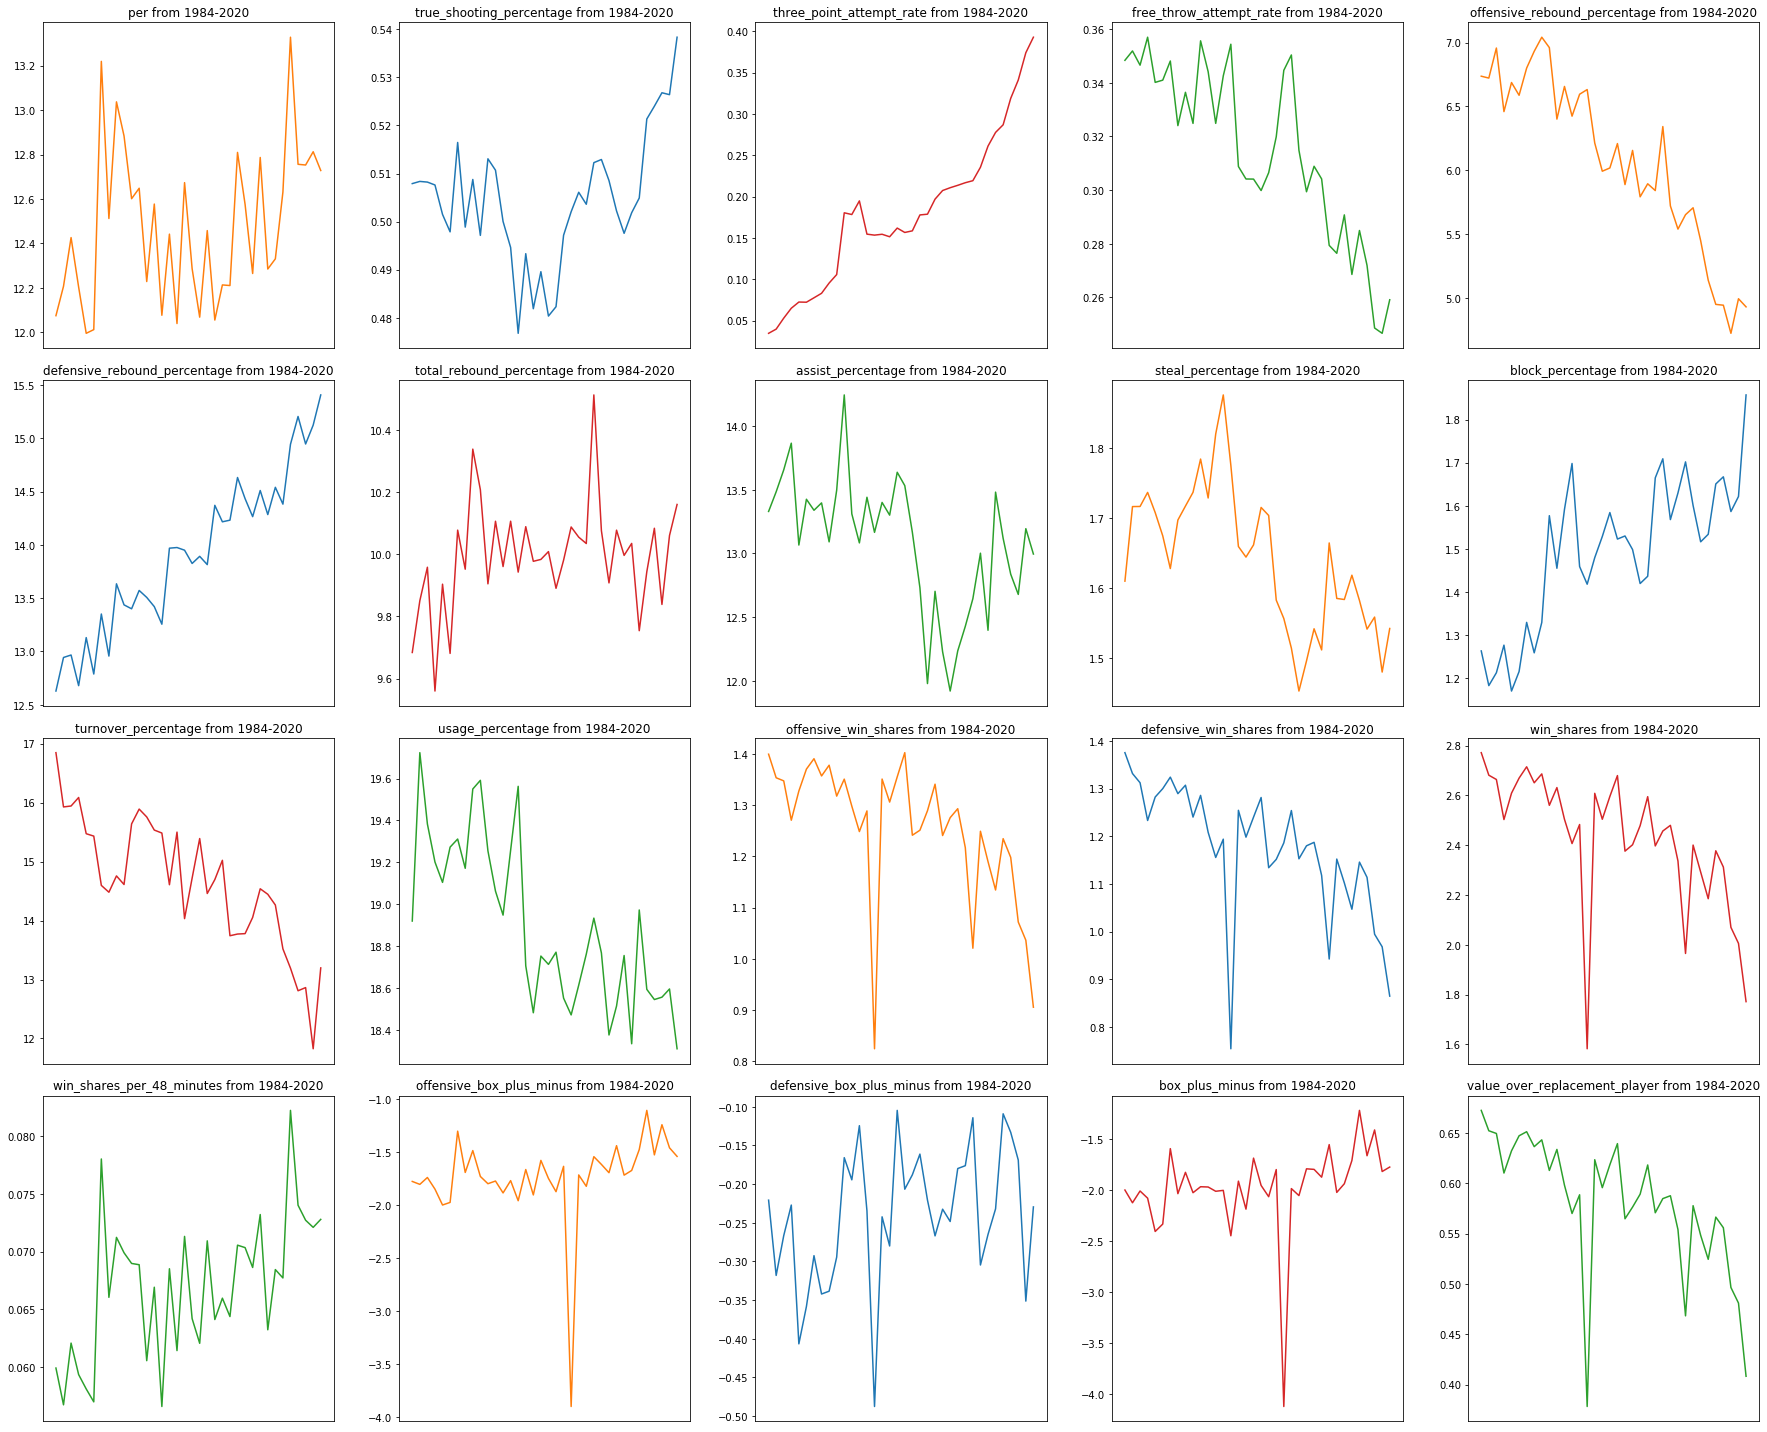

In [6]:
fig, axs = plt.subplots(4, 5)
colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']
for i in np.arange(4):
    for j in np.arange(5):
#         if 7*i+j % 4 == 0:
#             color = 'tab:orange'
#         elif 7*i+j % 4 == 1:
#             color = 'tab:red'
#         elif 7*i+j % 4 == 2:
#             color = 'tab:blue'
#         elif 7*i+j % 4 == 3:
#             color = 'tab:green'
            
        axs[i, j].plot(nba['year'], nba[columns[5*i+j]], colors[(5*i+j)%4])
        axs[i, j].set_title(columns[5*i+j] + ' from 1984-2020')     
        axs[i,j].set_xticks([])
        
fig.set_figheight(20)
fig.set_figwidth(25)
fig.tight_layout()

# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0,0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0,1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1,1]')

# for ax in axs.flat:
#     ax.set(xlabel='Season')

#Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [7]:
fig.savefig('advancedstatsovertime')

In [8]:
salaries = pd.read_excel('salaries.xlsx')

In [12]:
def ith_salary(i):
    def salary(x):
        if len(x) < i:
            return 0
        sorted_x = sorted(x)
        return sorted_x[-i]
    return salary


In [46]:
rank_salary = salaries.groupby(['season', 'team']).agg({'salary': [max, ith_salary(2), ith_salary(3), ith_salary(4), ith_salary(5),
                                                                  ith_salary(6), ith_salary(7), ith_salary(8), ith_salary(9), ith_salary(10)]})

In [47]:
rank_salary.isin([0]).sum()

salary  max        0
        salary    11
        salary    20
        salary    32
        salary    35
        salary    38
        salary    43
        salary    46
        salary    49
        salary    55
dtype: int64

In [48]:
rank_salary

salary                                          \
                                  max    salary    salary    salary    salary   
season  team                                                                    
1984-85 Atlanta Hawks          678000    491000    460000    450000    200000   
        Boston Celtics        1800000   1000000    830000    700000    405000   
        Chicago Bulls          660000    550000    550000    500000    410000   
        Cleveland Cavaliers    675000    475000    395000    284000    260000   
        Dallas Mavericks       800000    500000    250000    250000    215000   
...                               ...       ...       ...       ...       ...   
2019-20 Sacramento Kings     24147727  19269662  12000000   8556120   8529386   
        San Antonio Kings    27739975  26000000  14000000  12428571   6842307   
        Toronto Raptors      33296296  25595700  23271604  10116576   9000000   
        Utah Jazz            32511623  25008427  17000000  13437500  11954546   
        Washington Wizards   37800000  27093019  15450051   8730158   7936508   

                                                                          
                              salary   salary   salary   salary   salary  
season  team                                                              
1984-85 Atlanta Hawks         170000   160000   160000   105000        0  
        Boston Celtics        400000   400000   239000   175000   120000  
        Chicago Bulls         369000   300000   275000   200000   160000  
        Cleveland Cavaliers   209000   200000   150000   142000    90000  
        Dallas Mavericks      210000   200000   200000   130000        0  
...                              ...      ...      ...      ...      ...  
2019-20 Sacramento Kings     6825000  6500000  6392760  4861208  4767000  
        San Antonio Kings    5846154  5500000  5100000  3754886  2875000  
        Toronto Raptors      4000000  3623000  2500000  2351839  2281800  
        Utah Jazz            4767000  3635760  2564753  1962360  1737145  
        Washington Wizards   7000000  5853659  4469160  3567720  3219480  

[1010 rows x 10 columns]

In [49]:
new_rank = rank_salary.groupby('season').agg(np.mean).reset_index()

In [50]:
new_rank.columns = ['season', 'first', 'second', 'third', 'fourth', 'fifth',
                   'sixth', 'seventh', 'eighth', 'ninth', 'tenth']
new_rank

,season,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth
0,1984-85,9.793913e+05,6.683913e+05,4.922609e+05,3.886957e+05,3.138261e+05,2.435652e+05,1.910000e+05,1.356522e+05,9.400000e+04,4.739130e+04
1,1985-86,1.063021e+06,7.795870e+05,5.863913e+05,4.647002e+05,3.788913e+05,3.321580e+05,2.811955e+05,2.384927e+05,1.898869e+05,1.552174e+05
2,1986-87,6.941041e+05,3.140000e+05,1.776042e+05,1.078125e+05,5.906250e+04,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1987-88,1.332109e+06,1.007762e+06,7.438668e+05,5.790574e+05,5.091130e+05,4.300817e+05,3.579716e+05,2.926286e+05,2.442697e+05,1.890710e+05
4,1988-89,1.544834e+06,1.106715e+06,7.871000e+05,6.866200e+05,5.739866e+05,4.304080e+05,3.774373e+05,3.363800e+05,2.853800e+05,2.455000e+05
5,1989-90,2.125417e+06,1.252500e+06,7.945833e+05,1.916667e+05,4.583333e+04,4.583333e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,1990-91,2.323926e+06,1.694963e+06,1.332926e+06,1.070074e+06,8.903333e+05,7.868519e+05,6.572222e+05,5.665185e+05,4.855556e+05,4.115185e+05
7,1991-92,2.715148e+06,2.028074e+06,1.636889e+06,1.357407e+06,1.162111e+06,9.779259e+05,8.262222e+05,6.988148e+05,5.890000e+05,4.995556e+05
8,1992-93,2.961593e+06,2.340630e+06,1.987741e+06,1.632296e+06,1.356259e+06,1.177963e+06,9.708148e+05,8.051481e+05,6.650741e+05,5.686296e+05
9,1993-94,3.368370e+06,2.607259e+06,2.276852e+06,1.909333e+06,1.632000e+06,1.397852e+06,1.181481e+06,9.914950e+05,8.125556e+05,6.854815e+05


<Figure size 432x288 with 0 Axes>

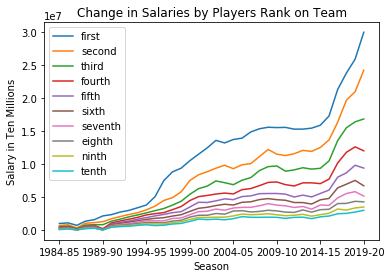

In [51]:
fig = plt.figure()
new_rank.plot(x = 'season')
plt.ylabel('Salary in Ten Millions')
plt.xlabel('Season')
plt.title('Change in Salaries by Players Rank on Team');

In [45]:
fig.savefig('changesalariesovertime.png')

In [56]:
all_stats = pd.read_excel('advanced_stats.xlsx')

In [60]:
all_stats.join(salaries.set_index('player_id'), on='slug', lsuffix = '_stats', rsuffix = '_salaries')

,slug,name,positions,age,team_stats,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,...,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,Year,names,salary,season,season_end,season_start,team_salaries
0,abdulka01,Kareem Abdul-Jabbar,CENTER,36,LOS ANGELES LAKERS,80,1.000000,32.775000,8.950000,15.475000,...,0.2,3.0,3.3,1983-84,Kareem Abdul-Jabbar,1530000.0,1984-85,1985.0,1984.0,Los Angeles Lakers
0,abdulka01,Kareem Abdul-Jabbar,CENTER,36,LOS ANGELES LAKERS,80,1.000000,32.775000,8.950000,15.475000,...,0.2,3.0,3.3,1983-84,Kareem Abdul-Jabbar,2030000.0,1985-86,1986.0,1985.0,Los Angeles Lakers
0,abdulka01,Kareem Abdul-Jabbar,CENTER,36,LOS ANGELES LAKERS,80,1.000000,32.775000,8.950000,15.475000,...,0.2,3.0,3.3,1983-84,Kareem Abdul-Jabbar,2000000.0,1987-88,1988.0,1987.0,Los Angeles Lakers
0,abdulka01,Kareem Abdul-Jabbar,CENTER,36,LOS ANGELES LAKERS,80,1.000000,32.775000,8.950000,15.475000,...,0.2,3.0,3.3,1983-84,Kareem Abdul-Jabbar,3000000.0,1988-89,1989.0,1988.0,Los Angeles Lakers
1,adamsal01,Alvan Adams,CENTER,29,PHOENIX SUNS,70,0.185714,20.742857,3.842857,8.314286,...,0.9,1.6,1.3,1983-84,Alvan Adams,500000.0,1984-85,1985.0,1984.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17159,zubaciv01,Ivica Zubac,CENTER,21,LOS ANGELES LAKERS,33,0.363636,15.636364,3.393939,5.848485,...,0.1,-0.2,0.2,NaN,Ivica Zubac,6481482.0,2019-20,2020.0,2019.0,Los Angeles Clippers
17160,zubaciv01,Ivica Zubac,CENTER,21,LOS ANGELES CLIPPERS,26,0.961538,20.153846,3.846154,7.153846,...,-0.5,-0.7,0.2,NaN,Ivica Zubac,1034956.0,2016-17,2017.0,2016.0,Los Angeles Lakers
17160,zubaciv01,Ivica Zubac,CENTER,21,LOS ANGELES CLIPPERS,26,0.961538,20.153846,3.846154,7.153846,...,-0.5,-0.7,0.2,NaN,Ivica Zubac,1312611.0,2017-18,2018.0,2017.0,Los Angeles Lakers
17160,zubaciv01,Ivica Zubac,CENTER,21,LOS ANGELES CLIPPERS,26,0.961538,20.153846,3.846154,7.153846,...,-0.5,-0.7,0.2,NaN,Ivica Zubac,1544951.0,2018-19,2019.0,2018.0,Los Angeles Lakers
